In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import glob
import json
import shutil
import sys
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

def find_project_root(marker=".gitignore"):
    current = Path.cwd()
    for parent in [current] + list(current.parents):
        if (parent / marker).exists():
            return parent.resolve()
    raise FileNotFoundError(
        f"Project root marker '{marker}' not found starting from {current}")
    
root = find_project_root()
src_path = f"{root}/src"
if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:
base_folder = f"{root}/images/STEREOS"
output_path = f"{root}/data/extrinsic_experiments.csv"
chessboard_size = (9, 6)
square_size_mm = 60

In [13]:
from calibrate_stereo_pair import calibrate_stereo_from_folder

experiments = [
    {'threshold': 0, 'win_size': (7, 7)},
    {'threshold': 0, 'win_size': (5, 5)},
    
    {'threshold': 0.4, 'win_size': (7, 7)},
    {'threshold': 0.4, 'win_size': (5, 5)},
    
    {'threshold': 0.2, 'win_size': (5, 5)},
    {'threshold': 0.1, 'win_size': (5, 5)},
    {'threshold': 0.09, 'win_size': (5, 5)}
]

intrinsic_path = os.path.join(root, "output", "V2_intrinsic_params.json")
with open(intrinsic_path, "r") as f:
    intrinsics = json.load(f)
    
results = []
for exp in experiments:
  stereo_a_folder = os.path.join(base_folder, "STEREO_A", "stereo_frames")
  stereo_a_params = calibrate_stereo_from_folder(
      cam_left_name="CAM_1",
      cam_right_name="CAM_2",
      folder=stereo_a_folder,
      chessboard_size=chessboard_size,
      square_size_mm=square_size_mm,
      intrinsic_left=intrinsics["CAM_1"],
      intrinsic_right=intrinsics["CAM_2"],
      error_threshold=exp["threshold"],
      window_size=exp["win_size"],
      allow_filtering=False if exp["threshold"] == 0 else True,
      debug_mode=False
  )

  stareo_a_results = {
    "stereo": "A",
    "threshold": exp["threshold"],
    "win_size": exp["win_size"][0],
    "frames_pairs_before": stereo_a_params["frame_pairs_before"],
    "frames_pairs_after": stereo_a_params["frame_pairs_after"],
    "error": stereo_a_params["reprojection_error"],
  }
  results.append(stareo_a_results)

  stereo_b_folder = os.path.join(base_folder, "STEREO_B", "stereo_frames")
  stereo_b_params = calibrate_stereo_from_folder(
      cam_left_name="CAM_3",
      cam_right_name="CAM_4",
      folder=stereo_b_folder,
      chessboard_size=chessboard_size,
      square_size_mm=square_size_mm,
      intrinsic_left=intrinsics["CAM_3"],
      intrinsic_right=intrinsics["CAM_4"],
      error_threshold=exp["threshold"],
      window_size=exp["win_size"],
      allow_filtering=False if exp["threshold"] == 0 else True,
      debug_mode=False
  )

  stareo_a_results = {
    "stereo": "B",
    "threshold": exp["threshold"],
    "win_size": exp["win_size"][0],
    "frames_pairs_before": stereo_b_params["frame_pairs_before"],
    "frames_pairs_after": stereo_b_params["frame_pairs_after"],
    "error": stereo_b_params["reprojection_error"],
  }
  results.append(stareo_a_results)



results_df = pd.DataFrame(results)
results_df.to_csv(output_path, index=False)


Processing folders:   0%|          | 0/24 [00:00<?, ?it/s]

Processing folders: 100%|██████████| 24/24 [00:23<00:00,  1.01it/s]


VALID PAIRS -> 24 REPROJECTION ERROR -> 3.434


Processing folders: 100%|██████████| 19/19 [00:19<00:00,  1.04s/it]


VALID PAIRS -> 19 REPROJECTION ERROR -> 3.879


Processing folders: 100%|██████████| 24/24 [00:22<00:00,  1.04it/s]


VALID PAIRS -> 24 REPROJECTION ERROR -> 1.754


Processing folders: 100%|██████████| 19/19 [00:20<00:00,  1.08s/it]


VALID PAIRS -> 19 REPROJECTION ERROR -> 3.552


Processing folders: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]


VALID PAIRS -> 18 REPROJECTION ERROR -> 3.384


Processing folders: 100%|██████████| 19/19 [00:19<00:00,  1.04s/it]


VALID PAIRS -> 13 REPROJECTION ERROR -> 3.497


Processing folders: 100%|██████████| 24/24 [00:22<00:00,  1.07it/s]


VALID PAIRS -> 24 REPROJECTION ERROR -> 1.754


Processing folders: 100%|██████████| 19/19 [00:19<00:00,  1.04s/it]


VALID PAIRS -> 19 REPROJECTION ERROR -> 3.552


Processing folders: 100%|██████████| 24/24 [00:22<00:00,  1.06it/s]


VALID PAIRS -> 19 REPROJECTION ERROR -> 1.519


Processing folders: 100%|██████████| 19/19 [00:19<00:00,  1.04s/it]


VALID PAIRS -> 14 REPROJECTION ERROR -> 1.447


Processing folders: 100%|██████████| 24/24 [00:23<00:00,  1.03it/s]


VALID PAIRS -> 9 REPROJECTION ERROR -> 0.835


Processing folders: 100%|██████████| 19/19 [00:19<00:00,  1.04s/it]


VALID PAIRS -> 9 REPROJECTION ERROR -> 0.996


Processing folders: 100%|██████████| 24/24 [00:23<00:00,  1.04it/s]


VALID PAIRS -> 7 REPROJECTION ERROR -> 0.795


Processing folders: 100%|██████████| 19/19 [00:20<00:00,  1.07s/it]

VALID PAIRS -> 9 REPROJECTION ERROR -> 0.996


In [15]:
original_df = pd.read_csv(output_path)

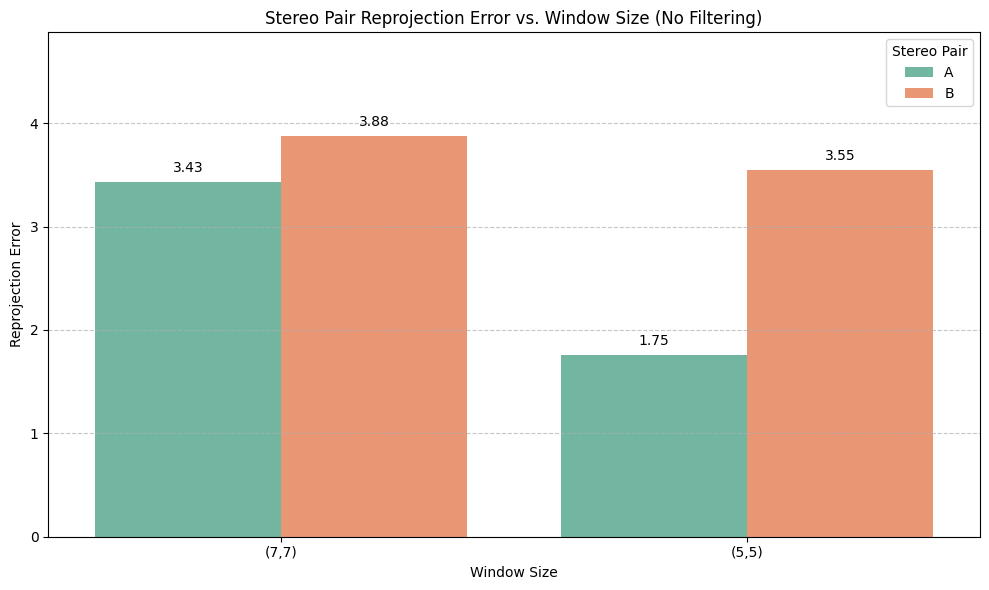

In [16]:
import seaborn as sns

import seaborn as sns

# Filter the data for threshold 0
df_threshold_0 = original_df[original_df['threshold'] == 0]

# Sort the data by reprojection error in descending order
df_threshold_0 = df_threshold_0.sort_values(by='error', ascending=False)

# Plot Reprojection Error vs. Window Size for Threshold 0
plt.figure(figsize=(10, 6))
stereo_order = ['A', 'B']  # Order of stereo pairs

barplot = sns.barplot(x='win_size', y='error', hue='stereo', data=df_threshold_0, 
                     palette='Set2',  # Using Set2 for better distinction between stereo pairs
                     order=[7, 5],    # Your window sizes
                     hue_order=stereo_order)

plt.title('Stereo Pair Reprojection Error vs. Window Size (No Filtering)')
plt.xlabel('Window Size')
plt.ylabel('Reprojection Error')
plt.legend(title='Stereo Pair', loc='upper right')
plt.ylim(0, df_threshold_0['error'].max() + 1)
plt.xticks(ticks=[0, 1], labels=["(7,7)", "(5,5)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with exact values
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(f'{height:.2f}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        xytext=(0, 5),
                        textcoords='offset points')

plt.tight_layout()
plt.show()